In [68]:
import numpy as np
import matplotlib.pyplot as plt

def energy(config, J, h, n):
    """ Compute the energy of a configuration of spins """
    # Interaction energy: -J * sum(s_i * s_{i+1})
    interaction_energy = -J * np.sum(config[:-1] * config[1:])
    # Transverse field energy: -h * sum(s_i)
    transverse_field_energy = -h * np.sum(config)
    return interaction_energy + transverse_field_energy

def metropolis_update(config, J, h, n):
    """ Perform one Metropolis-Hastings update: flip a single spin """
    # Pick a random spin index
    i = np.random.randint(n)
    
    # Flip the spin
    new_config = config.copy()
    new_config[i] = -new_config[i]
    
    # Calculate energy change
    delta_E = energy(new_config, J, h, n) - energy(config, J, h, n)
    
    # Metropolis criterion: accept the flip if the energy decreases, or with probability e^(-delta_E)
    if delta_E < 0 or np.random.rand() < np.exp(-delta_E):
        return new_config  # Accept the new configuration
    else:
        return config  # Reject the new configuration, keep the old one

def monte_carlo_simulation(n, J, h, num_steps, num_samples):
    """ Perform a Monte Carlo simulation of the transverse field Ising model """
    # Random initial configuration of spins (1 or -1)
    config = np.random.choice([-1, 1], size=n)
    
    # Store the number of up spins (config == 1) in each sample
    up_spins = np.zeros(num_samples)
    
    # Equilibration phase: discard the first half of steps
    equilibration_steps = num_steps // 2
    
    # Sampling phase
    sample_count = 0  # To keep track of how many samples we've collected

    # Monte Carlo sampling
    for step in range(num_steps):
        config = metropolis_update(config, J, h, n)
        
        # After equilibration, start recording the number of up spins
        if step >= equilibration_steps and sample_count < num_samples:
            up_spins[sample_count] = np.sum(config == 1)
            sample_count += 1
    
    return up_spins

def compute_probability_distribution(up_spins, n):
    """ Compute the probability distribution of the number of up spins """
    # Create bins based on the number of up spins (0 to n up spins)
    bins = np.arange(n + 1)
    
    # Compute the histogram of the number of up spins
    hist, _ = np.histogram(up_spins, bins=bins, density=True)
    
    return hist

# Example parameters
n = 10  # Number of spins
J = 0.05  # Interaction strength
h = 0.731  # Transverse field strength
num_steps = 100000  # Total number of Monte Carlo steps
num_samples = 10000  # Number of samples to collect

# Perform the Monte Carlo simulation
up_spins = monte_carlo_simulation(n, J, h, num_steps, num_samples)

# Compute the probability distribution
probabilities_per_bin = compute_probability_distribution(up_spins, n)

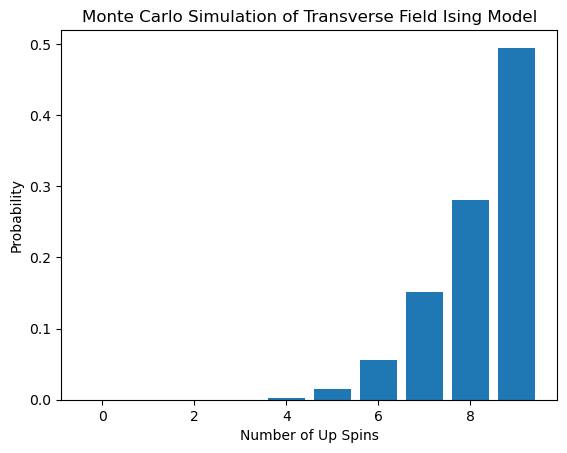

In [69]:
# Plot the probability distribution
plt.bar(np.arange(n), probabilities_per_bin, width=0.8, align='center')
plt.xlabel('Number of Up Spins')
plt.ylabel('Probability')
plt.title('Monte Carlo Simulation of Transverse Field Ising Model')
plt.show()

In [67]:
sum(probabilities_per_bin)

1.0